# Lab 07: Neural Network with Backpropagation
Bài tập này tương tự với Lab 03 Linear Regression, cơ bản chỉ khác thay vì dùng hàm linear, ta dùng một model neural network.

### 1.1 Data

Data dùng trong bài thực hành này gồm chiều dài dọc gân lá ($x_1$) và chiều ngang gân lá ($x_2$) và loại lá ($y$, có giá trị 0 hoặc 1).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv("bt_train.csv")
train.head()

,x1,x2,label
0,55.808717,54.602061,0
1,50.882672,52.736342,0
2,53.196444,44.208365,0
3,54.727839,60.406845,0
4,49.771372,48.405605,0


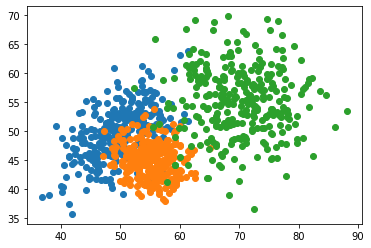

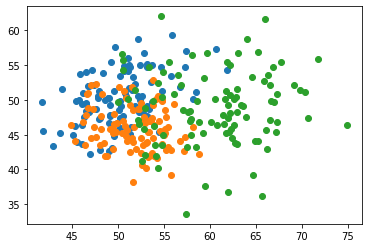

In [2]:

x1_train = train['x1'].values
x2_train = train['x2'].values
y_train = train['label'].values

plt.scatter(x1_train[y_train == 0], x2_train[y_train==0])
plt.scatter(x1_train[y_train == 1], x2_train[y_train==1])
plt.scatter(x1_train[y_train == 2], x2_train[y_train==2])

plt.figure()
valid = pd.read_csv("bt_valid.csv")
x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values

plt.scatter(x1_valid[y_valid == 0], x2_valid[y_valid==0])
plt.scatter(x1_valid[y_valid == 1], x2_valid[y_valid==1])
plt.scatter(x1_valid[y_valid == 2], x2_valid[y_valid==2])

## normalization
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std

### 1.2 Multi-class classification
Ta muốn dựa vào 2 chiều của lá, phân biệt giữa loại lá 1 và loại lá 2. Cụ thể, với $x = (x_1,x_2, 1)$ là input, ta muốn đoán một phân phối
$$ P_\theta(c|x),c = 0, 1 $$
với $\theta$ là các tham số.

Ta mô hình $P_\theta$ là một neural network có 2 lớp ẩn, mỗi lớp 5 neurons, tức là
$$ P_\theta(c|x) = \text{softmax}(\max(0, \max(0, x \cdot W_1 + b_1) \cdot W_2 + b_2) \cdot W_3 + b_3 )$$
với $x$ là vector dòng $[[x_1, x_2]]$ kích thước $ 1\times 2$, $W_1, W_2, W_3$ là các ma trận có kích thước $2 \times 5, 5 \times 5, 5 \times 3$, và $b_1, b_2, b_3$ là các ma trận kích thước $1 \times 5, 1 \times 5, 1 \times 3$. 

Khi đó $P(c|x)$ là một vector dòng độ dài 3, xem như  $P(c|x)= (P_1(c|x), P_2(c|x), P_3(c|x)) = (P(c=0|x), P(c=1|x), P(c=2|x))$

Bộ bác ma trận $\theta = (W_1, W_2, W_3, b_1, b_2, b_3)$ chính là tham số cần tìm của model. Giờ cần tìm $\theta$ sao cho 
$$ L = \frac{1}{N} \sum_{x,y} - y_0 \log P_\theta(0|x) -  y_1 \log P_\theta(1|x) - y_2 \log P_\theta(2|x) $$
đạt giá trị nhỏ nhất với $y = (y_0, y_1, y_2)$ là one-hot vector biểu thị loại lá tương ứng với $x$.



## Bài tập
- (33% điểm) Dùng sklearn train model neural network với tối thiểu 2 layer ẩn để đạt accuracy tốt nhất trên tập valid
- (100% điểm) Cài đặt lại backpropagation bằng numpy để tự học các ma trận $\theta$, huấn luyện đạt accuracy tốt nhất.

Điểm Lab này có giá trị bằng 2 Lab thường, được làm trong 2 tuần.

## Nộp bài
- Bài tập Lab 07 sẽ có 2 tuần để làm.
- Code và chạy kết quả lưu vào file notebook NMMH_TH7_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nén thành file NMMH_TH7_MSSV.rar (.zip) và nộp về: dinhvietcuong1996@gmail.com
- Deadline: 23g59 thứ 3 ngày 21/07/2020. Nộp trễ bị chia đôi số điểm.

Dùng sklearn train model neural network với tối thiểu 2 layer ẩn để đạt accuracy tốt nhất trên tập valid

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [4]:
df_train = pd.read_csv('./bt_train.csv')
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,900.0,58.256150,9.838619,36.835697,51.207617,55.582897,65.772671,88.072368
x2,900.0,49.923791,6.261130,35.759690,45.293391,48.863440,53.870140,69.823519
label,900.0,1.000000,0.816951,0.000000,0.000000,1.000000,2.000000,2.000000


In [5]:
df_valid = pd.read_csv('./bt_valid.csv')
df_valid.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,300.0,54.160850,6.235310,41.712759,49.797037,52.990272,57.563142,74.885479
x2,300.0,48.371201,4.542017,33.611923,45.253143,48.192719,51.234344,62.036312
label,300.0,1.000000,0.817861,0.000000,0.000000,1.000000,2.000000,2.000000


In [6]:
X_train = df_train.drop(['label'], axis=1)
y_train = df_train.label
X_train.shape, y_train.shape

((900, 2), (900,))

In [7]:
X_test = df_valid.drop(['label'], axis=1)
y_test = df_valid.label
X_test.shape, y_test.shape

((300, 2), (300,))

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 5, 5), activation='relu', solver='adam',  max_iter=4000, random_state=1)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[264  36   0]
 [ 42 257   1]
 [ 10  21 269]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       300
           1       0.82      0.86      0.84       300
           2       1.00      0.90      0.94       300

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900



In [10]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[90  8  2]
 [47 53  0]
 [19 53 28]]
              precision    recall  f1-score   support

           0       0.58      0.90      0.70       100
           1       0.46      0.53      0.50       100
           2       0.93      0.28      0.43       100

    accuracy                           0.57       300
   macro avg       0.66      0.57      0.54       300
weighted avg       0.66      0.57      0.54       300



N-Layer Neural Network Algorithm

- Initialize $W^{[1]}...W^{[L]}, b^{[1]}...b^{[L]}$
- Set $A^{[0]} = X(\text{Input}), L = \text{TotalLayers}$
- Loop epoch = 1 to max iteration
    - Foward Propagation
        - Loop $l=1$ to $L-1$
            - $Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$
            - $A^{[l]} = g(b^{[l]})$
            - Save $A^{[l]}, W^{[l]}$
        - $Z^{[L]} = W^{[L]}A^{[L-1]} + b^{[L]}$
        - $A^{[L]} = \sigma(Z^{[L]})$
    - Cost $J = -\frac{1}{n}\left(Ylog(A^{[2]}) - (1-Y)log(1 - A^{[2]})\right)$
    - Backward Propagation
        - $dA^{[L]}  = -\frac{Y}{A^{[L]}} + \frac{1-Y}{1- A^{[L]}}$
        - $dZ^{[L]} = dA^{[L]}\sigma^{'}(dA^{[L]})$
        - $dW^{[L]} = dZ^{[L]}dA^{[L-1]}$
        - $db^{[L]} = dW^{[L]}$
        - $dA^{[L-1]} = dZ^{[L]}W^{[L]}$
        - Loop $l = L - 1$ to 1
            - $dZ^{[l]} = dA^{[l]}g'(dA^{[l]})$
            - $dW^{[l]} = dZ^{[l]}dA^{[l-1]}$
            - $db^{[l]} = dZ^{[l]}$
            - $dA^{[l-1]} = Z^{[l]}W^{[l]}$
    - Update $W$ and $b$
        - Loop $l = 1$ to $L$
            - $W^{[l]} = W^{[l]} - \alpha.dW^{[l]}$
            - $b^{[l]} = b^{[l]} - \alpha.db^{[l]}$

Cài đặt  Neural Network

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
class NeuralNetwork:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []

    def initialize_parameters(self):
        np.random.seed(1)
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        return self.sigmoid(Z) * (1 - self.sigmoid(Z))

    def forward(self, X):
        W = {}
 
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            A = self.sigmoid(Z)
            W["A" + str(l + 1)] = A
            W["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            W["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) + self.parameters["b" + str(self.L)]
        A = self.sigmoid(Z)
        W["A" + str(self.L)] = A
        W["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        W["Z" + str(self.L)] = Z
 
        return A, W

    def backward(self, X, Y, W):
 
        derivatives = {}
 
        W["A0"] = X.T
 
        A = W["A" + str(self.L)]
        dA = -np.divide(Y, A) + np.divide(1 - Y, 1 - A)
 
        dZ = dA * self.sigmoid_derivative(W["Z" + str(self.L)])
        dW = dZ.dot(W["A" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = W["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.sigmoid_derivative(W["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(W["A" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = W["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives

    def fit(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, W = self.forward(X)
            cost = np.squeeze(-(Y.dot(np.log(A.T)) + (1 - Y).dot(np.log(1 - A.T))) / self.n)
            derivatives = self.backward(X, Y, W)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives[
                    "db" + str(l)]
 
            if loop % 100 == 0:
                print(cost)
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        n = X.shape[0]
        p = np.zeros((1, n))
 
        for i in range(0, A.shape[1]):
            if A[0, i] > 0.5:
                p[0, i] = 1
            else:
                p[0, i] = 0
 
        print("Accuracy: " + str(np.sum((p == Y) / n)))
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

In [17]:
X_train = train.drop(['label'], axis=1)
y_train = train.label 

X_test = train.drop(['label'], axis=1)
y_test = train.label 

In [19]:
X_train.shape, y_train.shape

((900, 2), (900,))

In [20]:
X_test.shape, y_test.shape

((900, 2), (900,))

[0.61405747 0.58375827 0.75940949]
[0.03007662 0.0303328  0.03286424]
[0.01315566 0.01281007 0.01392739]
[0.00820982 0.00784219 0.00856319]
[0.00590765 0.0055762  0.0061069 ]
[0.00458978 0.00429742 0.00471559]
[0.00374071 0.00348225 0.00382595]
[0.00315004 0.00291981 0.00321062]
[0.00271638 0.00250959 0.0027609 ]
[0.00238501 0.0021978  0.00241855]
Accuracy: 0.33333333333333337
Accuracy: 0.33333333333333337


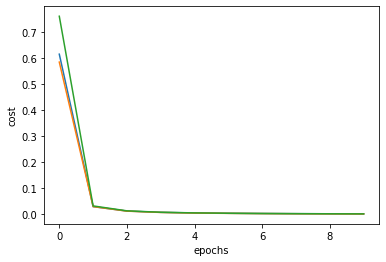

In [28]:
layers_dims = [2, 5, 5, 3]
 
nn = NeuralNetwork(layers_dims)
nn.fit(X_train.values, y_train.values, learning_rate=0.1, n_iterations=1000)
nn.predict(X_train.values, y_train.values)
nn.predict(X_test.values, y_test.values)
nn.plot_cost()